# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

#saved_lats = []
#saved_longs = []

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to  our cities list
    if city not in cities:
        cities.append(city)
       # saved_lats.append(lat_lng[0])
       # saved_longs.append(lat_lng[1])
        
#city_list = pd.DataFrame({"City":cities, "Approx. Latitude":saved_lats, "Approx. Longitude":saved_longs})
#city_list = pd.DataFrame({"City":cities})

#save to a csv (for reference - can compare estimated coordinates to actual co        

# Print the city count to confirm sufficient count
len(cities)
#city_list.head()

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

name_city = []
clouds = []
countries = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []

# Create record counter initialized at 1.
record = 1

# Print statement for log.
print("Beginning Data Retrieval")
print('-'*25)


# Loop through all cities in cities list.
for city in cities:
    
    # Try statement to append calls where values are found.
    try:
        response = requests.get(f'{base_url}&q={city}').json()
        name_city.append(response['name'])
        clouds.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        
        print(f'Processing Record {record} | {city}')
        
        # Increase record counter.
        record += 1
        
        # Do not exceed API call limit.
        time.sleep(1.01)
        
    # If no record found for city, then skip.
    except:
        print('City not found. Skipping...')
    continue


Beginning Data Retrieval
-------------------------
Processing Record 1 | soyo
Processing Record 2 | riyadh
Processing Record 3 | hithadhoo
Processing Record 4 | atuona
Processing Record 5 | longyearbyen
Processing Record 6 | seredka
Processing Record 7 | yellowknife
City not found. Skipping...
Processing Record 8 | tasiilaq
Processing Record 9 | woodward
Processing Record 10 | saskylakh
Processing Record 11 | tanete
Processing Record 12 | bambous virieux
Processing Record 13 | port elizabeth
Processing Record 14 | egvekinot
Processing Record 15 | fort payne
Processing Record 16 | avarua
Processing Record 17 | castro
Processing Record 18 | hilo
City not found. Skipping...
Processing Record 19 | nikolskoye
Processing Record 20 | provideniya
Processing Record 21 | mataura
Processing Record 22 | ushtobe
Processing Record 23 | upata
Processing Record 24 | vardo
Processing Record 25 | busselton
Processing Record 26 | tabou
City not found. Skipping...
Processing Record 27 | laguna
Processing 

Processing Record 228 | nemuro
Processing Record 229 | georgiyevka
Processing Record 230 | faya
Processing Record 231 | indramayu
Processing Record 232 | goias
Processing Record 233 | luderitz
Processing Record 234 | calvinia
Processing Record 235 | ahipara
Processing Record 236 | eyl
City not found. Skipping...
Processing Record 237 | berlevag
Processing Record 238 | maracas
Processing Record 239 | klaksvik
City not found. Skipping...
Processing Record 240 | dwarka
Processing Record 241 | carutapera
Processing Record 242 | basco
Processing Record 243 | owando
Processing Record 244 | lorengau
Processing Record 245 | tonantins
Processing Record 246 | barra do garcas
Processing Record 247 | kruisfontein
Processing Record 248 | acapulco
Processing Record 249 | toyooka
City not found. Skipping...
Processing Record 250 | barcelos
Processing Record 251 | qandala
Processing Record 252 | zhezkazgan
Processing Record 253 | bambamarca
Processing Record 254 | nanortalik
Processing Record 255 | sa

Processing Record 461 | saint-augustin
Processing Record 462 | los andes
Processing Record 463 | carandai
Processing Record 464 | zuenoula
City not found. Skipping...
Processing Record 465 | huarmey
Processing Record 466 | tonj
Processing Record 467 | ranong
Processing Record 468 | palmer
Processing Record 469 | olsztyn
Processing Record 470 | ovalle
Processing Record 471 | avera
Processing Record 472 | le vauclin
Processing Record 473 | jaisalmer
Processing Record 474 | havoysund
Processing Record 475 | canita
Processing Record 476 | kulhudhuffushi
Processing Record 477 | balad
Processing Record 478 | sept-iles
City not found. Skipping...
Processing Record 479 | west bay
Processing Record 480 | albanel
Processing Record 481 | ipixuna
Processing Record 482 | vallenar
City not found. Skipping...
Processing Record 483 | jabinyanah
Processing Record 484 | sun city west
Processing Record 485 | atar
Processing Record 486 | malinovoye ozero
Processing Record 487 | port hardy
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create values dictionary from API call lists.
weatherdata = {
    'City': name_city,
    'Cloudiness': clouds,
    'Country': countries,
    'Date': dates,
    'Humidity': humidities,
    'Lat': lats,
    'Lng': lngs,
    'Max Temperature': max_temps,
    'Wind Speed': wind_speeds
}

# Create new DF for values in dictionary.
df_weather = pd.DataFrame(weatherdata)

# Display count of weather values per column.
df_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temperature,Wind Speed
0,Soyo,100,AO,1666381795,86,-6.1349,12.3689,77.02,8.86
1,Riyadh,0,SA,1666381576,14,24.6877,46.7219,75.34,9.53
2,Hithadhoo,100,MV,1666381797,78,-0.6000,73.0833,80.82,10.38
3,Atuona,42,PF,1666381799,63,-9.8000,-139.0333,77.09,16.84
4,Longyearbyen,20,SJ,1666381800,63,78.2186,15.6401,24.64,17.27


In [6]:
df_weather.to_csv('weather_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

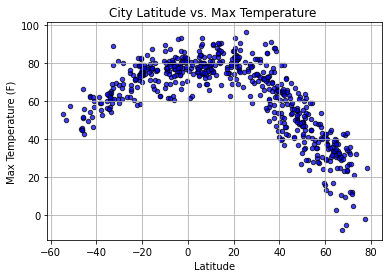

In [7]:
# Create scatter plot for Lat vs Max Temp.
plt.scatter(df_weather['Lat'], df_weather['Max Temperature'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Format axis/labels.
plt.title('City Latitude vs. Max Temperature ')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('Max_Temp_vs_Lat.png')

plt.show()


In [ ]:
#OBSERVATION FROM ABOVE SCATTER PLOT:
#The Temperature (F) vs. Latitude plot shown above, which includes data from all cities, peaks at approximately 20-degrees latitude.
# The latitude values below that latitude show a possible linear relationship with temperature, and the latitude values 
#above that latitude also show a possible linear relationship with temperature, with both trends ending at the same peak temperature
# and latitude.


## Latitude vs. Humidity Plot

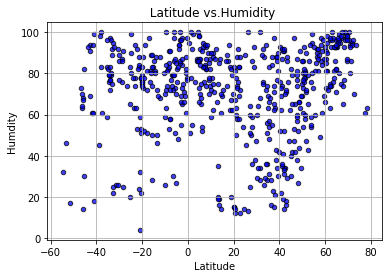

In [8]:
plt.scatter(df_weather['Lat'], df_weather['Humidity'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)
plt.title(' Latitude vs.Humidity  ')
plt.ylabel('Humdity')
plt.xlabel('Latitude')
plt.grid(True)


plt.savefig('Lat_vs_Humidity.png')
plt.show()

In [ ]:
# observation from above sctter plot:


#The Humidity vs. Latitude plot shown above, which contains data from all cities, shows a relatively spread-out distribution of data points
#There does not appear to be a relationship between humidity and latitude at first glance, but the humidity percentages seem to largely
# cluster above 50%.


## Latitude vs. Cloudiness Plot

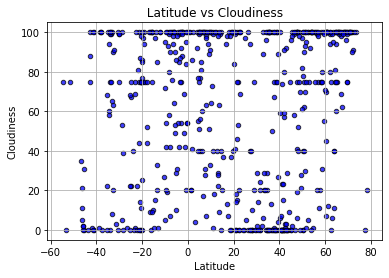

In [9]:
plt.scatter(df_weather['Lat'], df_weather['Cloudiness'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)
plt.title(' Latitude vs Cloudiness ')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid(True)


plt.savefig('Lat_vs_Cloudiness.png')
plt.show()

In [ ]:
# observation:
#The Cloudiness vs. Latitude plot shown above, containing data from all cities, does not seem to show a relationship between 
#cloudiness and city latitude. There seem to be some values for cloudiness that the points cluster along, noticeably 0, 20, 40, 75, 90, and
# 100, so those values may be rounded or categorized from some of the sources, and not represent continuous measurements.


## Latitude vs. Wind Speed Plot

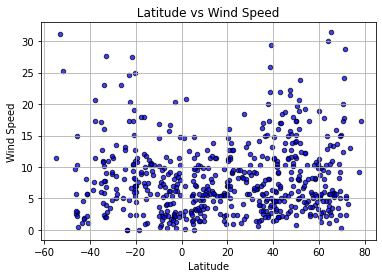

In [10]:
plt.scatter(df_weather['Lat'], df_weather['Wind Speed'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)
plt.title(' Latitude vs Wind Speed ')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.grid(True)


plt.savefig('Lat_vs_Wind_Speed.png')
plt.show()

In [ ]:
#observation:

#The Wind speed vs. Latitude plot, shown above for all cities, does not seem to show any relationship between wind speed and latitude. 
#Most of the wind speed values are below about 25 mph, with only a few values above that wind speed limit.

## Linear Regression

In [11]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = df_weather.loc[pd.to_numeric(df_weather["Lat"]).astype(float) > 0, :]
southern_df = df_weather.loc[pd.to_numeric(df_weather["Lat"]).astype(float) < 0, :]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.9x + 92.82
The r-squared is: -0.8591212498440336
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


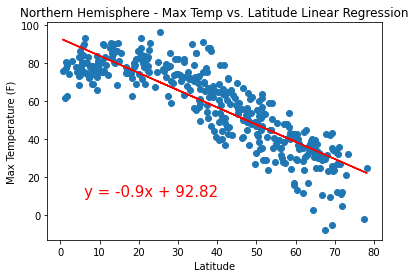

In [15]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temperature']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig('MAx_temp_vs_lat_North')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.56x + 81.86
The r-squared is: 0.7478502379312976
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


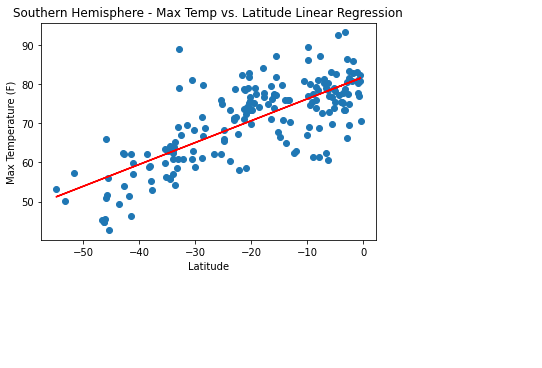

In [16]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temperature']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig('Max_temp_vs_lat_south')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.2x + 63.44
The r-squared is: 0.17574435088162665
The regression does not display much of a correlation between the data sets.


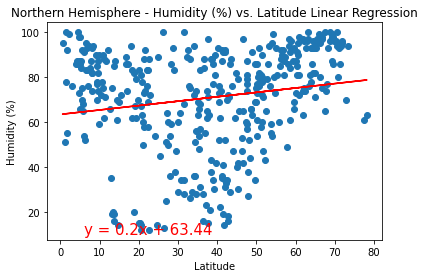

In [18]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.savefig('Humid_vs_Lat_North')
print(f"The r-squared is: {rvalue}")

print("The regression does not display much of a correlation between the data sets.") 
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.25x + 77.59
The r-squared is: 0.16745135385275509
The regression does not display much of a correlation between the data sets.


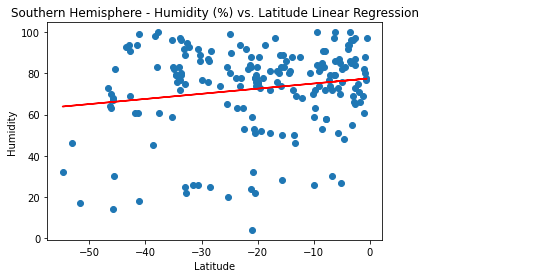

In [20]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.savefig('Humid_vs_lat_south')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.28x + 49.57
The r-squared is: 0.1406248966607323
The regression does not display much of a correlation between the data sets.


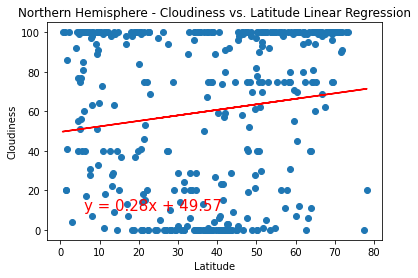

In [21]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.savefig('Cloudiness_vs_lat_north')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.79x + 76.94
The r-squared is: 0.28921572061949224
The regression does not display much of a correlation between the data sets.


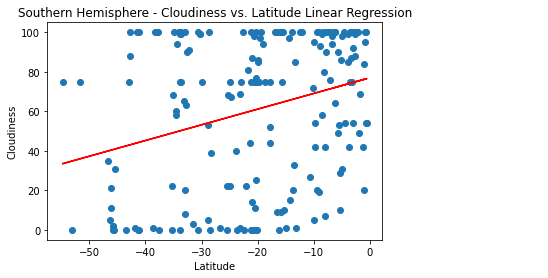

In [22]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.savefig('Cloudiness_vs_lat_south')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.05x + 6.14
The r-squared is: 0.19623776760079956
The regression does not display much of a correlation between the data sets.


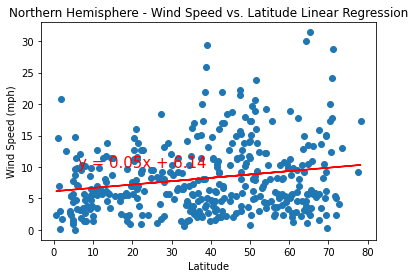

In [23]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.savefig('WindSpeed_vs_lat_North')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.08x + 6.59
The r-squared is: -0.1765229794863492
The regression does not display much of a correlation between the data sets.


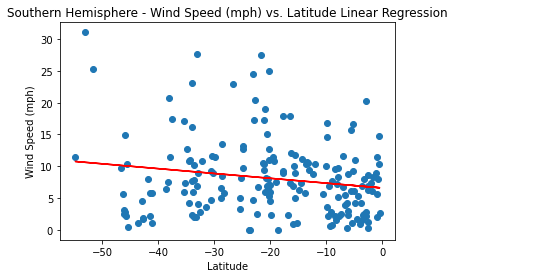

In [24]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.savefig('Windspeed_vs_Lat_south')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()